<a href="https://colab.research.google.com/github/pitapatat/aib_project_1/blob/main/AI_04_%EB%B0%B0%ED%95%98%EB%8B%88_section2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/waste_generation_3-2.csv',encoding = 'cp949', thousands = ',')
df.head(3)
df.shape

(2702, 31)

In [113]:
df.columns

####column name_rename ###
mapper = {'수집운반처리비총계(백만원)':'total_cost', '주민부담율( )':'per_cost', 
          '주거지역':'residential_area', '상업지역':'commercial_area',
          '생활폐기물발생량<br>(A) (톤/일)': 'waste_generation','주민등록인구<br>(B) (명)':'pop',
          'Unnamed: 10':'grdp_ratio', '1인당 지역내총생산':'grdp', 
          '일반폐기물재활용률<br>(A÷B×100) ( ) ,b = 생활폐기물총발생량':'recycling_ratio',
          '총재활용량<br>(A) (톤/일)':'total_recycling','재활용품센터 설치운영여부': 'recycle_center',
          '수거방식 합계':'total_collected', '문전수거식':'door_collected','주민상차식':'load_collected',
          '거점수거식':'hub_collected','총인구수': 'total_pop', 
          '0~9세':'under_9','10~19세':'10_19','20~29세':'20_29', '30~39세':'30_39', '40~49세':'40_49',
          '50~59세':'50_59', '60~69세':'60_69', '70~79세':'70_79','80~89세':'80_89', '90~99세':'90_99', '100세 이상':'over_100'}

df.rename(columns=mapper, inplace=True)
df.columns

Index(['year', 'region', 'district', 'target', 'total_cost', 'per_cost',
       'residential_area', 'commercial_area', 'waste_generation', 'pop',
       'grdp_ratio', 'grdp', 'recycling_ratio', 'total_recycling',
       'recycle_center', 'total_collected', 'door_collected', 'load_collected',
       'hub_collected', 'total_pop', 'under_9', '10_19', '20_29', '30_39',
       '40_49', '50_59', '60_69', '70_79', '80_89', '90_99', 'over_100'],
      dtype='object')

In [114]:
##### district 값들 이상해 >> 문자 제거
df.district = df.district.apply(lambda x : x.replace('\u3000\u3000\u3000', ''))
#df.district.unique()

In [115]:
df.dtypes

########## object > 공백 있는 부분 일단 제거 
ob = df.select_dtypes('object').columns
df[ob] = df[ob].apply(lambda x: x.str.strip(), axis = 1)

In [116]:
############# 결측값이 있는 특성 찾기(출처:강의노트)#####
[(col, df[col].isnull().sum()) for col in df.columns if df[col].isnull().any()]

[('region', 4),
 ('residential_area', 1),
 ('commercial_area', 1),
 ('grdp_ratio', 2697),
 ('recycle_center', 176),
 ('total_collected', 1),
 ('door_collected', 796),
 ('load_collected', 2658),
 ('hub_collected', 1389)]

In [117]:
##### 결측값 확인
df[df.region.isnull() == True]
df.region.fillna('경상북도', inplace = True)
df.region.isnull().sum()

0

In [118]:
df[df.residential_area.isnull() == True] 
#df.residential_area.fillna(0, inplace = True)
#df.commercial_area.fillna(0, inplace = True)
#df.loc[df.district == '옹진군']   

######### 인천_옹진군(area 면적 데이터 없음) >> drop >> 조건 있을 땐, index 찾아서 그걸 drop()에 넣기 ######  
drop_need=df.loc[df.residential_area == 0.0].index  
df = df.drop(drop_need)

In [119]:
######### integer 연도 값을 datetime 으로 변경하기 #################너무 해맸다!!!!############3 완전 기억하기!!!!!!!!!!!!
df.year = pd.to_datetime(df.year, format = '%Y')
df.year

0      2009-01-01
1      2009-01-01
2      2009-01-01
3      2009-01-01
4      2009-01-01
          ...    
2697   2019-01-01
2698   2019-01-01
2699   2019-01-01
2700   2019-01-01
2701   2019-01-01
Name: year, Length: 2692, dtype: datetime64[ns]

In [120]:
### wastr_generation >> type 바꿔
df.waste_generation = df.waste_generation.str.replace(',','')

## 잠깐....어떤 녀석이....문제가 있어...찾아보니, 2018. 미추홀구 데이터 없음 > 249930 으로 추정
df[df.waste_generation.str.contains('-') ==True]
df.loc[[2272], 'waste_generation'] = '249.93'
df[(df.year == 2018) & (df.district == '미추홀구')]

df.waste_generation = df.waste_generation.apply(pd.to_numeric)

In [121]:
##연령별 인구 범위 조정 > 0-19, 20-39, 40-59, 60-79, 80이상 (5구간)
cols = ['under_9', '10_19', '20_29', '30_39', '40_49', '50_59', '60_69', '70_79', '80_89', '90_99', 'over_100']

##각 연령별 전체 인구 대비 해당 연령 비율로 feature 생성 
df['under_20'] = df['under_9'] + df['10_19']
df['20_39s'] = df['20_29'] + df['30_39']
df['40-59s'] = df['40_49'] + df['50_59']
df['60-79s'] = df['60_69'] + df['70_79']
df['over_80'] = df['80_89'] + df['90_99']+ df['over_100']


In [122]:
### 기존 column 삭제
df.drop(columns = cols, inplace= True)
df.head(3)

,year,region,district,target,total_cost,per_cost,residential_area,commercial_area,waste_generation,pop,grdp_ratio,grdp,recycling_ratio,total_recycling,recycle_center,total_collected,door_collected,load_collected,hub_collected,total_pop,under_20,20_39s,40-59s,60-79s,over_80
0,2009-01-01,서울특별시,서울특별시,1.1,"179,994",58.5,30.17,2.54,11336.8,10208302,1.0000,28967,68.1,7721.6,NaN,4144325.0,4144325.0,NaN,NaN,10208302,2157587,3518795,3123603,1264603,143714
1,2009-01-01,서울특별시,종로구,2.3,"11,330",46.0,53.29,22.12,385.4,168603,0.0165,28967,63.0,242.9,0.0,74479.0,74479.0,NaN,NaN,168603,32511,55036,52194,25410,3452
2,2009-01-01,서울특별시,중구,3.8,"12,324",51.4,49.05,27.96,487.4,129465,0.0127,28967,59.6,290.7,1.0,58146.0,58146.0,NaN,NaN,129465,22980,43822,40136,19925,2602


In [123]:
df.columns

Index(['year', 'region', 'district', 'target', 'total_cost', 'per_cost',
       'residential_area', 'commercial_area', 'waste_generation', 'pop',
       'grdp_ratio', 'grdp', 'recycling_ratio', 'total_recycling',
       'recycle_center', 'total_collected', 'door_collected', 'load_collected',
       'hub_collected', 'total_pop', 'under_20', '20_39s', '40-59s', '60-79s',
       'over_80'],
      dtype='object')

In [124]:
## 나머지 feature engineering 은 train/test split 한 뒤, 함수 만들어서 하기   < 한꺼번에 처리 후, split했다가 train.score = 1...... OTL
#### train_test_split : 약 8:2 비율 위해 2018년 이후는 test, 나머지는 trian_raw
cond =(df['year'].dt.year >= 2018)
test = df[cond]
train_raw = df[~cond]
print(train_raw.shape)

## train_val_split: 2016년 이후는 val, 나머지는 train
cond2 = (train_raw['year'].dt.year >= 2016)
val = train_raw[cond2]
train = train_raw[~cond2]
print(train.shape, val.shape, test.shape)

(2204, 25)
(1716, 25) (488, 25) (488, 25)


In [125]:
## double check!!
train.year.unique()
val.year.unique()
test.year.unique()

array(['2018-01-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [126]:
### 전처리 함수
def clean(df):
    df = df.copy()

    #########수거방식(collected)_fillna >> nan = 0 으로 처리하고 total 은 합계 확인용으로 하고, drop
    df.loc[:,'door_collected'] = df.loc[:,'door_collected'].fillna(0)
    df.loc[:,'load_collected'] = df.loc[:,'load_collected'].fillna(0)
    df.loc[:,'hub_collected'] = df.loc[:,'hub_collected'].fillna(0)

    #collected(수기 입력부분 있는) 값 체크 > 확인 후, excel에서 데이터 수정 
    #df['sum_check'] = df['door_collected'] + df['load_collected'] + df['hub_collected']
    #df[df['sum_check'] !=df['total_collected']]
    #광명_hub = 71372, 연천_hub = 35381

    #### recycle_center 유무 나타내는 feature >> type: category
    df.recycle_center = df.recycle_center.astype('category')
    
    ### 원래 target으로 하려던 target값이 소수 첫째자리밖에 없어서, 직접 계산해서 feature 새로 만들기
    ###### kg/1인 으로 구하기 위해 *1000(기준= ton이므로)
    df['waste_per'] = (df['waste_generation']* 1000 /df['pop']) 

    ## recycle_center = null 인 행(시도별 총합계 row) 삭제
    tot_index = df.loc[df.recycle_center.isnull() == True].index
    df = df.drop(tot_index)

    return df

In [127]:
train = clean(train)
val = clean(val)
test = clean(test)

In [128]:
train.shape, val.shape, test.shape

((1604, 26), (456, 26), (456, 26))

In [129]:
def final(df):
    df = df[['year','waste_per','per_cost','residential_area', 'commercial_area', 'grdp', 'recycling_ratio',
        'recycle_center','door_collected', 'load_collected','hub_collected', 'under_20', '20_39s', '40-59s', '60-79s','over_80']]

    ### melt(age_pop) ##
    id_vars = ['year', 'waste_per', 'per_cost', 'residential_area', 'commercial_area','grdp', 'recycling_ratio',
            'recycle_center', 'door_collected','load_collected', 'hub_collected']
    df = pd.melt(df,id_vars = id_vars, var_name = "age_range", value_vars = ['under_20', '20_39s', '40-59s','60-79s', 'over_80'], value_name = "age_pop")

    ## null 제거 
    ind =df.loc[df.residential_area.isnull() == True].index 
    df = df.drop(ind)     

    return df

In [130]:
train = final(train)
val = final(val)
test = final(test)

train.shape, val.shape, test.shape

((8015, 13), (2280, 13), (2280, 13))

In [131]:
train.head(3)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8015 entries, 0 to 8019
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   year              8015 non-null   datetime64[ns]
 1   waste_per         8015 non-null   float64       
 2   per_cost          8015 non-null   float64       
 3   residential_area  8015 non-null   float64       
 4   commercial_area   8015 non-null   float64       
 5   grdp              8015 non-null   int64         
 6   recycling_ratio   8015 non-null   float64       
 7   recycle_center    8015 non-null   category      
 8   door_collected    8015 non-null   float64       
 9   load_collected    8015 non-null   float64       
 10  hub_collected     8015 non-null   float64       
 11  age_range         8015 non-null   object        
 12  age_pop           8015 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(8), int64(2), object(1)
memory usag

In [132]:
#### 일단 파일 저장
train.to_csv('/content/drive/MyDrive/sc2_proj_train.csv', sep = ',')
val.to_csv('/content/drive/MyDrive/sc2_proj_val.csv', sep = ',')
test.to_csv('/content/drive/MyDrive/sc2_proj_test.csv', sep = ',')

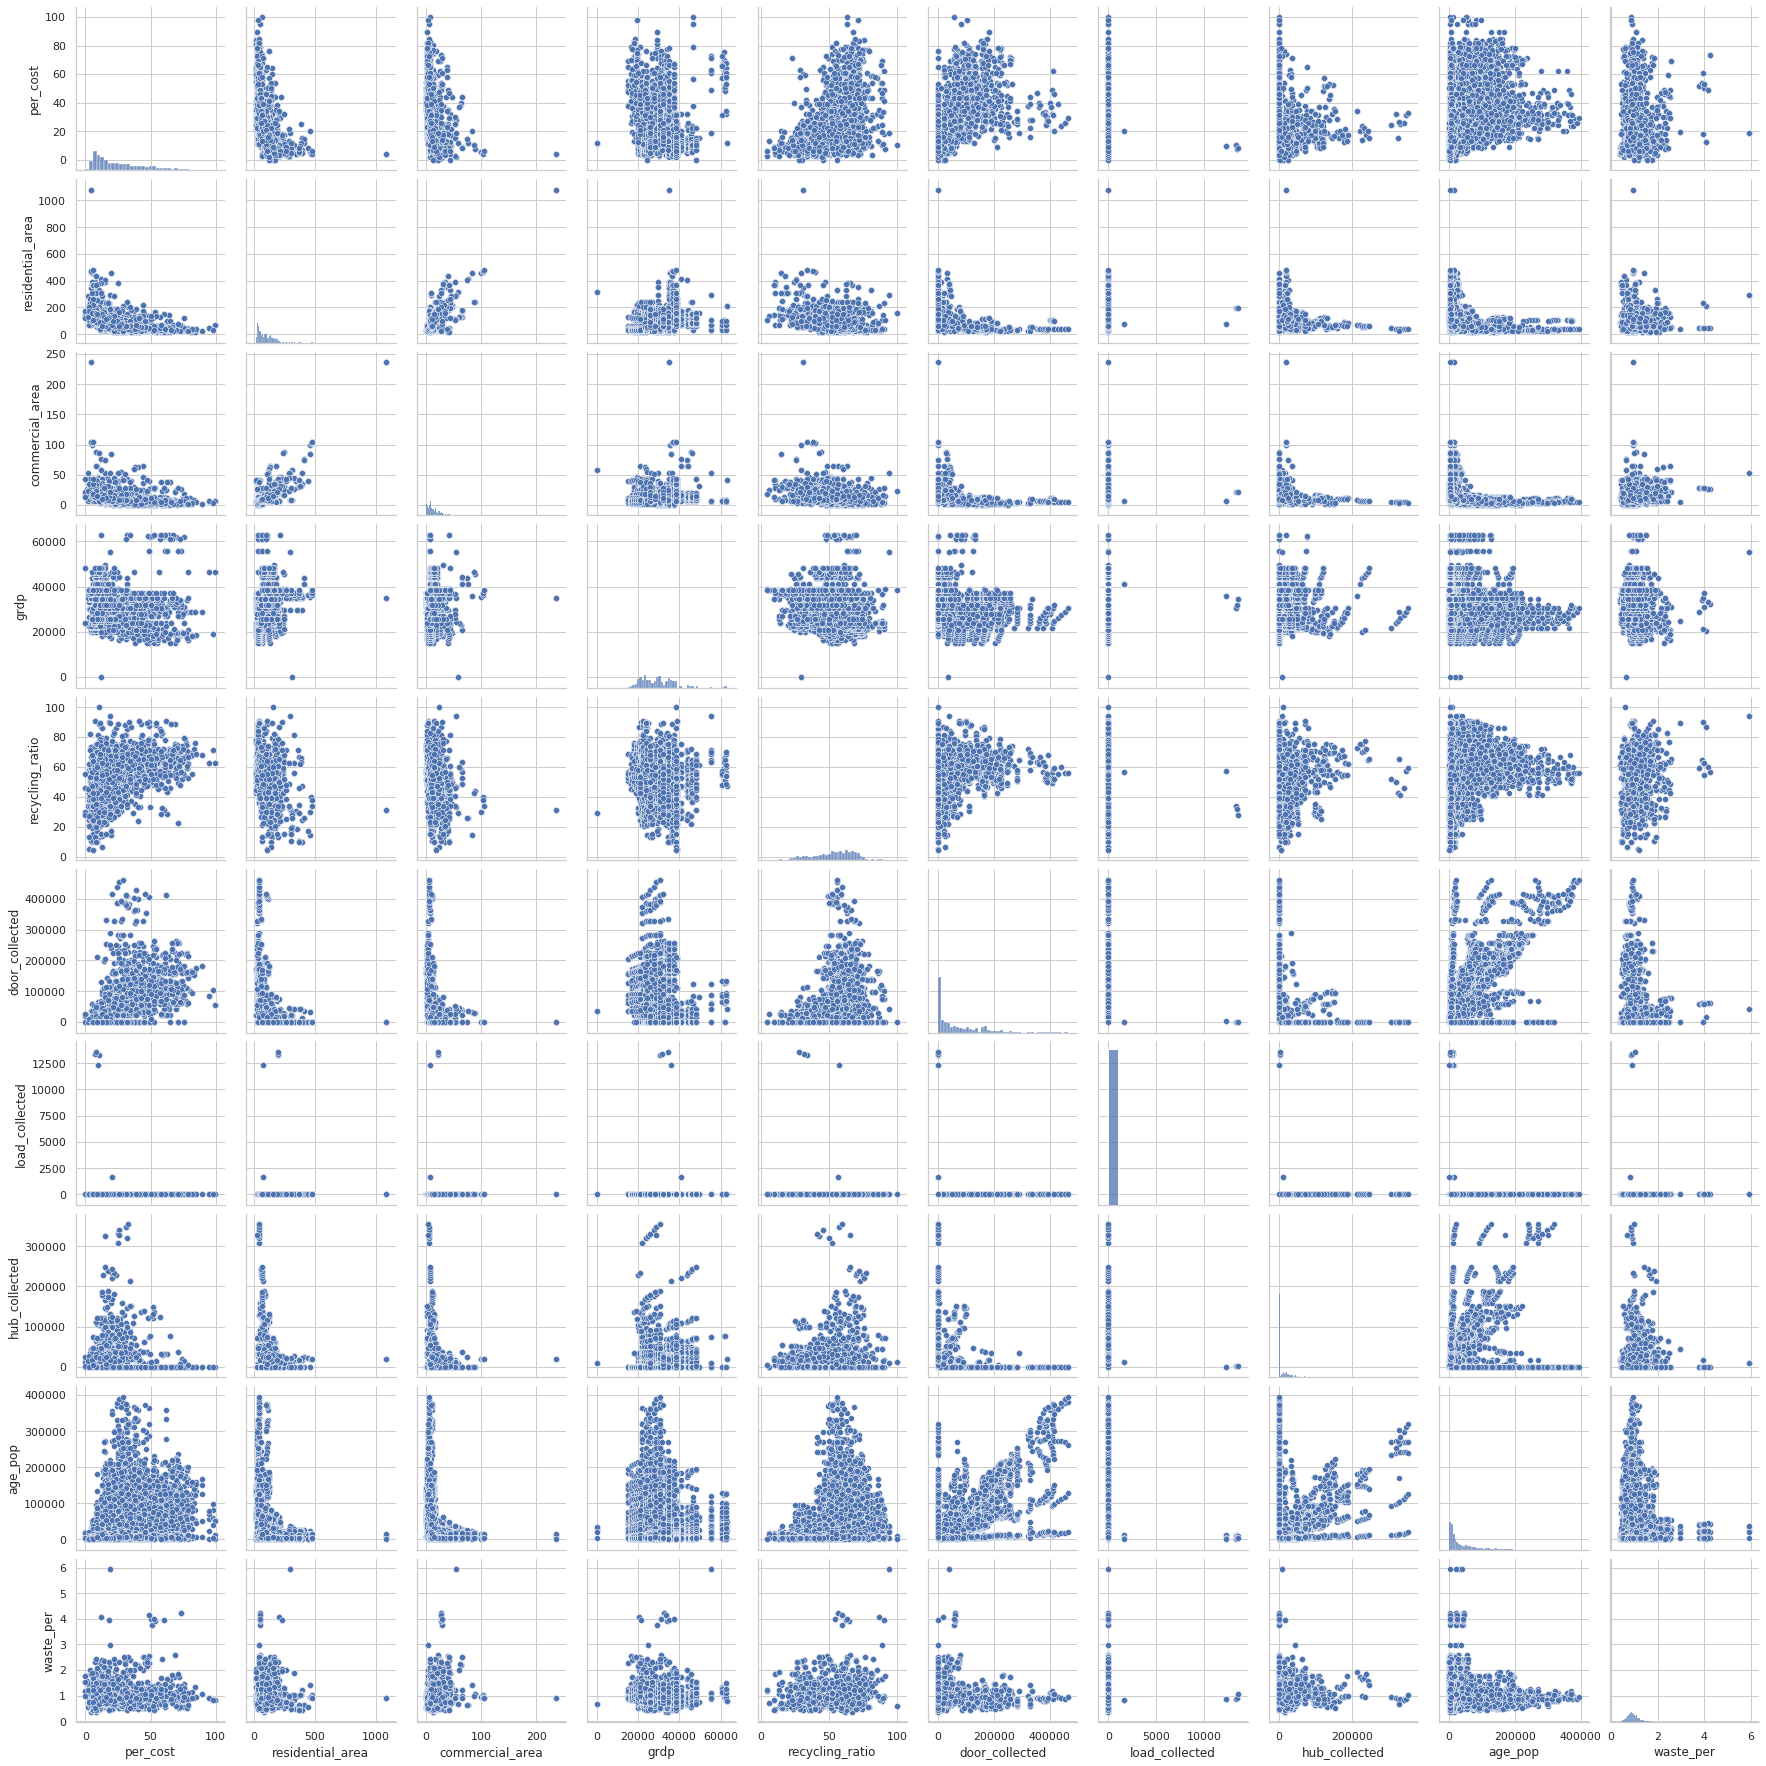

In [133]:
## 시각화로 파악하기
import seaborn as sns

sns.set(style = 'whitegrid', context = 'notebook')
cols = ['year','per_cost', 'residential_area', 'commercial_area','grdp', 'recycling_ratio', 'recycle_center', 
        'door_collected','load_collected', 'hub_collected', 'age_range', 'age_pop', 'waste_per']
sns.pairplot(train[cols])

In [134]:
## scatter plot
import plotly.express as px
fig = px.box(train, x = 'year' , y = 'waste_per', color = 'age_range', notched = True)
fig.show()

In [135]:
#train.groupby(by= 'year')['commercial_area']
#fig = px.histogram(train, x = 'year' , y = 'waste_per', color =)
#fig.show()

In [136]:
fig = px.box(train, x = 'year' , y = 'waste_per', color = 'recycle_center', notched = True)
fig.show()

In [137]:
## corr ...그닥 상관관계 없어보이는 ㅠ.ㅠ
train.corr()[:1]

,waste_per,per_cost,residential_area,commercial_area,grdp,recycling_ratio,door_collected,load_collected,hub_collected,age_pop
waste_per,1.0,0.037473,0.009669,0.195578,-0.032017,0.080716,-0.150008,-0.013092,0.046175,-0.108009


In [138]:
target = 'waste_per'

X_train = train.drop(columns = [target, 'year'])
y_train = train[target]

X_val = val.drop(columns = [target, 'year'])
y_val = val[target]

X_test = test.drop(columns = [target, 'year'])
y_test = test[target]

X_train.shape, y_train.shape, X_val.shape, y_val.shape,  X_test.shape, y_test.shape 

((8015, 11), (8015,), (2280, 11), (2280,), (2280, 11), (2280,))

In [139]:
X_train.head(3)

,per_cost,residential_area,commercial_area,grdp,recycling_ratio,recycle_center,door_collected,load_collected,hub_collected,age_range,age_pop
0,46.0,53.29,22.12,28967,63.0,0.0,74479.0,0.0,0.0,under_20,32511
1,51.4,49.05,27.96,28967,59.6,1.0,58146.0,0.0,0.0,under_20,22980
2,71.2,47.65,6.22,28967,66.5,1.0,107434.0,0.0,0.0,under_20,44791


In [140]:
####### outlier 제거?, feature, target 분포 확인 ###상관관계 체크
## target 따로 분리 > log transform 해서 분포 확인, 어떤게 더 나은지 체크
## pipe_ encoding _age_range 는 onehot or target encoding
## collected는 나중에 스케일링 조절 필요(나중에 pipe에서)
## pipe_ select k best 해보기 
## 기본적으로 회귀분석, but 어떤 기준점 정해서 분류로 풀어보는것도 시도 하기
## 어떤 모델할 지 정하기 
## 회귀: 선형회귀(다중), 릿지, 결정트리, 랜덤포레스트, xgboost
## 분류: 로지스틱, 결정트리, 랜던포레스트, xgboost
## 교차 검증_& hyper parameter tuning
## 평가지표 설정(회귀/분류 구분해서)
## pdp, shap 으로 feature importance 

skewness :3.282567 1.454552587743227
kurtosis :20.531468 3.0695154943862213


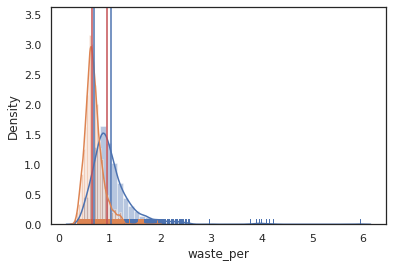

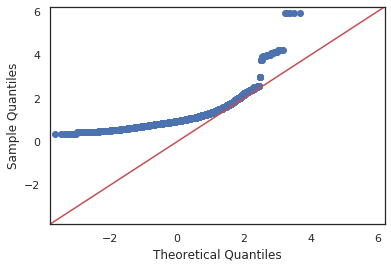

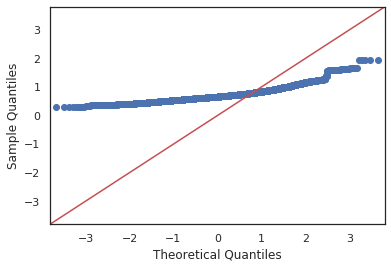

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab as py

import warnings   ### ignore useless warning 
warnings.filterwarnings(action="ignore")

sns.set(style = 'white', context='notebook')
target = 'waste_per'

## target_distribution
sns.distplot(train[target], kde = True, rug = True)
#ax.line = df_raw.waste_per.mean()
plt.axvline(train[target].mean(), color = 'b')
plt.axvline(train[target].median(), color = 'r');

## target_log_transform distribution
sns.distplot(np.log1p(train[target]), kde = True, rug = True)
plt.axvline(np.log1p(train[target]).mean(), color = 'b')
plt.axvline(np.log1p(train[target]).median(), color = 'r');

# skewness 
print("skewness :%f" % train[target].skew(),  np.log1p(train[target].skew()))  #right-skewed (+-2 기준)
print("kurtosis :%f" % train[target].kurt(), np.log1p(train[target].kurt()))  #outlier 많음 

##qq_plot _target 값/ 추후 residual로 한 번 더 해보기
sm.qqplot(train[target], line = '45')
sm.qqplot(np.log1p(train[target]), line = '45')
py.show()

In [142]:
!pip install category_encoders

from sklearn.preprocessing import RobustScaler, StandardScaler    ##outlier 일단 제거 전, 영향 최소화하는 scaler 사용
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_val_score, RandomizedSearchCV

from sklearn.pipeline import make_pipeline

###### model
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.compose import TransformedTargetRegressor

from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import f_regression, SelectKBest

## ipywidget
from ipywidgets import interact

###### metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from IPython.display import display

from scipy.stats import randint, uniform

In [143]:
# baseline = target의 평균값
base = np.log1p(y_train).mean()
base

# baseline_metrics
y_pred_base_t = [base] * len(y_train)
y_pred_base_v = [base] * len(y_val)

#train_평가
mae = mean_absolute_error(y_train,y_pred_base_t)
mse = mean_squared_error(y_train,y_pred_base_t)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred_base_t)

display(pd.DataFrame([['mae_t',mae], ['mse_t', mse], ['rmse_t',rmse], ['r2_t',r2]],
                     columns = ['metric', 'score']))


,metric,score
0,mae_t,0.370947
1,mse_t,0.312092
2,rmse_t,0.558652
3,r2_t,-0.601398


In [144]:
#baseline_val_평가
mae = mean_absolute_error(y_val,y_pred_base_v)
mse = mean_squared_error(y_val,y_pred_base_v)
rmse = np.sqrt(mse)
r2 = r2_score(y_val,y_pred_base_v)

display(pd.DataFrame([['mae_v',mae], ['mse_v', mse], ['rmse_v',rmse], ['r2_v',r2]],
                     columns = ['metric', 'score']))

,metric,score
0,mae_v,0.434153
1,mse_v,0.353760
2,rmse_v,0.594777
3,r2_v,-0.979447


In [145]:
## linear regression
mapping = {'under_20':5,  '20_39s':4, '40-59s':3, '60-79s':2,  'over_80':1 }
 
pipe_linear = make_pipeline(
    OrdinalEncoder(cols = ['age_range'], 
                   mapping = [{'col': 'age_range', 'mapping': mapping}]),
    #StandardScaler(),
    RobustScaler(quantile_range = (10.0, 90.0)),
    #PolynomialFeatures(degree = 2),
    LinearRegression()
)

tt_linear = TransformedTargetRegressor(regressor=pipe_linear,
                                func=np.log1p, inverse_func=np.expm1)

tt_linear.fit(X_train, y_train)  
y_pred_v = tt_linear.predict(X_val)

mae = mean_absolute_error(y_val, y_pred_v)
mse = mean_squared_error(y_val, y_pred_v)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred_v)

display(pd.DataFrame([['mae',mae], ['mse', mse], ['rmse',rmse], ['r2',r2]],
                     columns = ['metric_linear', 'score']))
print('train_score:', tt_linear.score(X_train, y_train))
print('val_score:', tt_linear.score(X_val, y_val))

,metric_linear,score
0,mae,0.284634
1,mse,0.172922
2,rmse,0.415839
3,r2,0.032423


train_score: 0.13751401737269842
val_score: 0.032423230839183415


In [146]:
## ridge
pipe_ridge = make_pipeline(
    #OneHotEncoder(cols = ['age_range'], use_cat_names = True),
    OrdinalEncoder(cols = ['age_range'], 
                   mapping = [{'col': 'age_range', 'mapping': mapping}]),
    RobustScaler(quantile_range = (10.0, 90.0)),
    #StandardScaler(),
    Ridge()
)

tt_ridge = TransformedTargetRegressor(regressor=pipe_ridge,
                               func=np.log1p, inverse_func=np.expm1)

tt_ridge.fit(X_train, y_train)  
y_pred_v = tt_ridge.predict(X_val)

mae = mean_absolute_error(y_val, y_pred_v)
mse = mean_squared_error(y_val, y_pred_v)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred_v)

display(pd.DataFrame([['mae',mae], ['mse', mse], ['rmse',rmse], ['r2',r2]],
                     columns = ['metric_ridge', 'score']))
print('train_score:', tt_ridge.score(X_train, y_train))
print('val_score:', tt_ridge.score(X_val, y_val))

,metric_ridge,score
0,mae,0.284623
1,mse,0.172931
2,rmse,0.415849
3,r2,0.032374


train_score: 0.13742557353377083
val_score: 0.032373980976004746


In [147]:
## decisiontree_regressor
pipe_tree = make_pipeline(
    #OneHotEncoder(cols = ['age_range'], use_cat_names = True),
    OrdinalEncoder(cols = ['age_range'], 
                   mapping = [{'col': 'age_range', 'mapping': mapping}]),
    RobustScaler(quantile_range = (10.0, 90.0)),
    #StandardScaler(),
    DecisionTreeRegressor()
)

tt_tree = TransformedTargetRegressor(regressor=pipe_tree,
                                func=np.log1p, inverse_func=np.expm1)

tt_tree.fit(X_train, y_train)   
y_pred_v = tt_tree.predict(X_val)

mae = mean_absolute_error(y_val, y_pred_v)
mse = mean_squared_error(y_val, y_pred_v)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred_v)

display(pd.DataFrame([['mae',mae], ['mse', mse], ['rmse',rmse], ['r2',r2]],
                     columns = ['metric_tree', 'score']))
print('train_score:', tt_tree.score(X_train, y_train))
print('val_score:', tt_tree.score(X_val, y_val))

#########train_score 가 1에 가까우니까 leakage가 발생한 것 같은데, 무엇일까...모르겠다..ㅠ.ㅠ

,metric_tree,score
0,mae,0.266943
1,mse,0.182117
2,rmse,0.426752
3,r2,-0.019028


train_score: 0.9999999598015171
val_score: -0.019028391487131424


In [148]:
## data leakage...같은데 누군지 모르겠어어엉어어 
potential_leaks = ['recycle_center' ]  #'recycling_ratio'
X_train1 = X_train.copy()
X_train1 = X_train1.drop(potential_leaks, axis = 1)
cv_scores = cross_val_score(tt_tree, X_train1, y_train,scoring = 'r2' )
print("Cross-val accuracy: %f" %cv_scores.mean())

Cross-val accuracy: 0.796677


In [149]:
pipe_rf = make_pipeline(
    #OneHotEncoder(cols = ['age_range'], use_cat_names = True),
    OrdinalEncoder(cols = ['age_range'], 
                   mapping = [{'col': 'age_range', 'mapping': mapping}]),
    RobustScaler(quantile_range = (10.0, 90.0)),
    RandomForestRegressor(random_state = 2)
)

tt_rf = TransformedTargetRegressor(regressor=pipe_rf,
                                func=np.log1p, inverse_func=np.expm1)

tt_rf.fit(X_train, y_train)   #linear_score: r^2
y_pred_v = tt_rf.predict(X_val)

mae = mean_absolute_error(y_val, y_pred_v)
mse = mean_squared_error(y_val, y_pred_v)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred_v)

display(pd.DataFrame([['mae',mae], ['mse', mse], ['rmse',rmse], ['r2',r2]],
                     columns = ['metric_rf', 'score']))
print('train_score:', tt_rf.score(X_train, y_train))
print('val_score:', tt_rf.score(X_val, y_val))

,metric_rf,score
0,mae,0.215786
1,mse,0.106166
2,rmse,0.325831
3,r2,0.405955


train_score: 0.9997818436387457
val_score: 0.4059548991996924


In [152]:
### randomforest model_hyperparameter tuning  ## 약 1시간 30분 소요  

dists = {'robustscaler__quantile_range' :[(25.0,75.0),(20.0,80.0),(15.0,95.0), (10.0,90.0), (1.0,99.0)],
         'randomforestregressor__n_estimators': randint(50,400),
         'randomforestregressor__criterion': ['mse','mae'],
         'randomforestregressor__max_depth': [5,10,15,20,25,30,35,40],
         'randomforestregressor__max_features':uniform(0, 1)}

clf = RandomizedSearchCV(pipe_rf, param_distributions= dists, 
                         n_iter = 50, cv = 3, scoring = 'neg_mean_absolute_error', 
                         verbose = 1, n_jobs = -1)

clf.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 17.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=['age_range'],
                                                             drop_invariant=False,
                                                             handle_missing='value',
                                                             handle_unknown='value',
                                                             mapping=[{'col': 'age_range',
                                                                       'mapping': {'20_39s': 4,
                                                                                   '40-59s': 3,
                                                                                   '60-79s': 2,
                                                                                   'over_80': 1,
                                 

In [153]:
#print('최적_hyperparameter:', clf.best_params_)
#print('mae', -clf.best_score_)
display(pd.Series(clf.best_params_ ))

randomforestregressor__criterion                mse
randomforestregressor__max_depth                 40
randomforestregressor__max_features        0.880314
randomforestregressor__n_estimators             272
robustscaler__quantile_range           (10.0, 90.0)
dtype: object

In [ ]:
## target_log transform 하는 경우(시간이 좀 걸린다...)

pipe_rf_best = clf.best_estimator_
#{'randomforestregressor__criterion': 'mae', 'randomforestregressor__max_depth': 30, 
#'randomforestregressor__max_features': 0.9319028670461312, 'randomforestregressor__n_estimators': 315, 
#'robustscaler__quantile_range': (10.0, 90.0)}

tt_rf = TransformedTargetRegressor(regressor=pipe_rf_best,
                                func=np.log1p, inverse_func=np.expm1)

tt_rf.fit(X_train, y_train)  
y_pred_v = tt_rf.predict(X_val)

mae = mean_absolute_error(y_val, y_pred_v)
mse = mean_squared_error(y_val, y_pred_v)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred_v)

display(pd.DataFrame([['mae',mae], ['mse', mse], ['rmse',rmse], ['r2',r2]],
                     columns = ['metric_rf_best', 'score']))
print('train_score:', tt_rf.score(X_train, y_train))
print('val_score:', tt_rf.score(X_val, y_val))

In [154]:
####################(다시 돌아와서~~~~~)############### 실제 test_data 적용 ###########
tt_rf = TransformedTargetRegressor(regressor=pipe_rf_best,
                                func=np.log1p, inverse_func=np.expm1)

tt_rf.fit(X_train, y_train)  
y_pred = tt_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

display(pd.DataFrame([['mae',mae], ['mse', mse], ['rmse',rmse], ['r2',r2]],
                     columns = ['metric_rf_best', 'score']))
print('train_score:', tt_rf.score(X_train, y_train))
print('val_score:', tt_rf.score(X_test, y_test))

,metric_rf_best,score
0,mae,0.299018
1,mse,0.205988
2,rmse,0.453859
3,r2,0.076858


train_score: 0.99984392184128
val_score: 0.07685791834808708


In [155]:
##################(다시 돌아와서~~~~~)############# train, val 합쳐서 모두 학습 >> test 적용하기 
X = pd.concat([X_train, X_val])
y = pd.concat([y_train, y_val])
X.shape, y.shape

((10295, 11), (10295,))

In [156]:
tt_rf = TransformedTargetRegressor(regressor=pipe_rf_best,
                                func=np.log1p, inverse_func=np.expm1)

tt_rf.fit(X, y)  
y_pred = tt_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

,metric_rf_best,score
0,mae,0.229760
1,mse,0.152175
2,rmse,0.390096
3,r2,0.318024


train_score: 0.9997733467246099
val_score: 0.318023604797083


In [158]:
display(pd.DataFrame([['mae',mae], ['mse', mse], ['rmse',rmse], ['r2',r2]],
                     columns = ['metric_rf_best', 'test_score']))
print('train_score:', tt_rf.score(X, y))
print('test_score:', tt_rf.score(X_test, y_test))

,metric_rf_best,test_score
0,mae,0.229760
1,mse,0.152175
2,rmse,0.390096
3,r2,0.318024


train_score: 0.9997733467246099
test_score: 0.318023604797083


In [ ]:
## target_log transform 하지 않은 경우

pipe_rf_best = clf.best_estimator_

y_pred_v = pipe_rf_best.predict(X_val)
mae = mean_absolute_error(y_val, y_pred_v)
mse = mean_squared_error(y_val, y_pred_v)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred_v)

display(pd.DataFrame([['mae',mae], ['mse', mse], ['rmse',rmse], ['r2',r2]],
                     columns = ['metric_rf_best', 'score']))

In [ ]:
## 특성중요도
rf = pipe_rf_best.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

n = 10
plt.figure(figsize = (10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [ ]:
## drop columns
'''
column = 'recycling_ratio'

# without column
pipe_rf_best.fit(X_train.drop(columns=column), y_train)
score_without = pipe_fr_best.score(X_val.drop(columns=column), y_val)
print(f'검증 정확도 ({column} 제외): {score_without}')

# with column
pipe_rf_best.fit(X_train, y_train)
score_with = pipe_rf_best.fit.score(X_val, y_val)
print(f'검증 정확도 ({column} 포함): {score_with}')

# difference btw within/out
print(f'{column}의 Drop-Column 중요도: {score_with - score_without}')
'''

In [ ]:
## 순열중요도
! pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.pipeline import Pipeline

In [ ]:
pipe_final= make_pipeline(
    #OneHotEncoder(cols = ['age_range'], use_cat_names = True),
    OrdinalEncoder(cols = ['age_range'], 
                   mapping = [{'col': 'age_range', 'mapping': mapping}]),
    RobustScaler(quantile_range = (10.0, 90.0)),
    RandomForestRegressor(criterion = 'mae', max_depth= 30, max_features= 0.9319028670461312, 
                          n_estimators= 315, random_state=2)
)

tt_rf = TransformedTargetRegressor(regressor=pipe_final,
                                func=np.log1p, inverse_func=np.expm1)

tt_rf.fit(X_train, y_train)  
y_pred_v = tt_rf.predict(X_val)

mae = mean_absolute_error(y_val, y_pred_v)
mse = mean_squared_error(y_val, y_pred_v)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred_v)

display(pd.DataFrame([['mae',mae], ['mse', mse], ['rmse',rmse], ['r2',r2]],
                     columns = ['metric_rf_best', 'score']))
print('train_score:', tt_rf.score(X_train, y_train))
print('val_score:', tt_rf.score(X_val, y_val))


In [ ]:
### 순열중요도
pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(cols = ['age_range'], mapping = [{'col': 'age_range', 'mapping': mapping}]),RobustScaler(quantile_range = (15.0, 95.0)))),
     ('rf', RandomForestRegressor(criterion = 'mae', max_depth= 30, max_features= 0.9319028670461312, n_estimators= 315, random_state=2))
     ])

pipe.named_steps
X_train_transformed = pipe.named_steps['preprocessing'].fit_transform(X_train, y_train)
X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)

pipe.named_steps['rf'].fit(X_train_transformed, y_train)
permuter = PermutationImportance(pipe.named_steps['rf'], scoring = 'r2', n_iter = 5, random_state=2)
permuter.fit(X_val_transformed, y_val);


In [ ]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

In [ ]:
eli5.show_weights(permuter, top = None, feature_names = feature_names)

In [ ]:
## columns 재조정(순열중요도 기준 하위 3개 제거)  >> r2_0.01 상승
## randomforest
'''
col = ['per_cost', 'residential_area', 'commercial_area', 'grdp',
       'recycling_ratio', 'recycle_center', 'door_collected', 'hub_collected']

X_train_up = X_train[col]
X_val_up = X_val[col]
X_test_up = X_test[col]

pipe_final= make_pipeline(
    #OneHotEncoder(cols = ['age_range'], use_cat_names = True),
    #OrdinalEncoder(cols = ['age_range'], 
    #               mapping = [{'col': 'age_range', 'mapping': mapping}]),
    RobustScaler(quantile_range = (15.0, 95.0)),
    RandomForestRegressor(criterion = 'mae', max_depth= 40, max_features= 0.8218184770129687, 
                          n_estimators= 390, random_state=2)
)

tt_rf = TransformedTargetRegressor(regressor=pipe_final,
                                func=np.log1p, inverse_func=np.expm1)

tt_rf.fit(X_train_up, y_train)  
y_pred_v = tt_rf.predict(X_val_up)

mae = mean_absolute_error(y_val, y_pred_v)
mse = mean_squared_error(y_val, y_pred_v)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred_v)

display(pd.DataFrame([['mae',mae], ['mse', mse], ['rmse',rmse], ['r2',r2]],
                     columns = ['metric_rf_best', 'score']))
print('train_score:', tt_rf.score(X_train_up, y_train))
print('val_score:', tt_rf.score(X_val_up, y_val))
'''

In [ ]:
!pip install shap
import shap

In [ ]:
explainer = shap.TreeExplainer(pipe.named_steps['rf'] ,X_train_transformed)
shap_values = explainer.shap_values(X_val_transformed, check_additivity=False)

##데이터에 문제가 있긴 한 것 같은데...뭔지 아직 모르겠다.....
'''
Additivity check failed in TreeExplainer! 
Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. 
If your data shape is correct then please report this on GitHub. 
This check failed because for one of the samples the sum of the SHAP values was 0.827560, while the model output was 0.810425.
If this difference is acceptable you can set check_additivity=False to disable this check.
'''


In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_val)

In [ ]:
shap.summary_plot(shap_values, X_train.iloc[:300], plot_type="bar")

In [ ]:
############################## 실제 test data 적용

X = pd.concat([X_train, X_val])
y = pd.concat([y_train, y_val])

X_test_transformed = pipe.named_steps['preprocessing'].transform(X_test)

X_transformed = pipe.named_steps['preprocessing'].fit_transform(X, y)
X_test_transformed = pipe.named_steps['preprocessing'].transform(X_test)

pipe.named_steps['rf'].fit(X_transformed, y)
permuter = PermutationImportance(pipe.named_steps['rf'], scoring = 'r2', n_iter = 5, random_state=2)
permuter.fit(X_test_transformed, y_val);

feature_names = X_test.columns.tolist()

eli5.show_weights(permuter, top = None, feature_names = feature_names)

shap_values = explainer.shap_values(X_test_transformed)
shap.summary_plot(shap_values, X_transformed)



In [159]:
## xgboost
pipe_xg = make_pipeline(
    #OneHotEncoder(cols = ['age_range'], use_cat_names = True),
    OrdinalEncoder(cols = ['age_range'], 
                   mapping = [{'col': 'age_range', 'mapping': mapping}]),
    RobustScaler(quantile_range = (10.0, 90.0)),
    XGBRegressor()
)

tt_xg = TransformedTargetRegressor(regressor=pipe_xg,
                                func=np.log1p, inverse_func=np.expm1)

tt_xg.fit(X_train, y_train) 
y_pred_v = tt_xg.predict(X_val)

mae = mean_absolute_error(y_val, y_pred_v)
mse = mean_squared_error(y_val, y_pred_v)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred_v)

display(pd.DataFrame([['mae',mae], ['mse', mse], ['rmse',rmse], ['r2',r2]],
                     columns = ['metric', 'score']))
print('train_score:', tt_xg.score(X_train, y_train))
print('val_score:', tt_xg.score(X_val, y_val))

[05:19:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,metric,score
0,mae,0.246365
1,mse,0.122216
2,rmse,0.349593
3,r2,0.316148


train_score: 0.709524956760743
val_score: 0.31614811022521405


In [ ]:
## early stop
pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(cols = ['age_range'], mapping = [{'col': 'age_range', 'mapping': mapping}]),
                                    RobustScaler(quantile_range = (10.0, 90.0))))])

X_train_transformed = pipe.named_steps['preprocessing'].fit_transform(X_train, y_train)
X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)

model  = XGBRegressor(n_estimator = 500, gamman = 3 , max_depth = 7, learning_rate = 0.2)

eval_set = [(X_train_transformed, y_train), (X_val_transformed, y_val)]
model.fit(X_train_transformed, y_train, eval_set = eval_set, 
          eval_metric='mae',early_stopping_rounds = 30)

In [ ]:
results = model.evals_result()
train_error = results['validation_0']['mae']
val_error = results['validation_1']['mae']

epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('mae')
plt.xlabel('Model Complexity (n_estimators)')
plt.ylim((0.15, 0.25)) # Zoom in
plt.legend();

In [ ]:
print('검증 정확도', model.score(X_val_transformed, y_val))

In [ ]:
## pdp  'commercial_area' , 'per_cost', 'door_collected'
!pip install pdpbox
from pdpbox.pdp import pdp_isolate, pdp_plot

In [ ]:
feature = 'commercial_area'
model = tt_xg.fit(X_train, y_train)
isolated = pdp_isolate(model = model, dataset =X_val, model_features =X_val.columns, feature = feature)
pdp_plot(isolated, feature_name = feature);

In [ ]:
feature = 'per_cost'
model = tt_xg.fit(X_train, y_train)
isolated = pdp_isolate(model = model, dataset =X_val, model_features =X_val.columns, feature = feature)
pdp_plot(isolated, feature_name = feature);

In [ ]:
feature = 'door_collected'
model = tt_xg.fit(X_train, y_train)
isolated = pdp_isolate(model = model, dataset =X_val, model_features =X_val.columns, feature = feature)
pdp_plot(isolated, feature_name = feature);

In [ ]:
feature = 'recycling_ratio'
model = tt_xg.fit(X_train, y_train)
isolated = pdp_isolate(model = model, dataset =X_val, model_features =X_val.columns, feature = feature)
pdp_plot(isolated, feature_name = feature);

In [ ]:
feature = 'grdp'
model = tt_xg.fit(X_train, y_train)
isolated = pdp_isolate(model = model, dataset =X_val, model_features =X_val.columns, feature = feature)
pdp_plot(isolated, feature_name = feature);